# Building Good Datasets

Code following along with the 4th section of the opensesame turorial [python machine learning course](https://player.opensesame.com/coursecontent/e0574515-e184-9194-31e9-355866e13f22/232590/00000000-0000-0000-0000-000000000000/62D4A280;de06e6f7424c2da8eefe20a3a55d1d5039561b361b5dd60e332433627667306c/scormcontent/index.html#/).

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
from io import StringIO
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap

# set the plot figure size
rcParams["figure.figsize"] = 10, 5
%matplotlib inline

## Data Prep

In [3]:
csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,"""

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### Dropping or filtering missing data

In [4]:
# check for NA values
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
# drop rows with missing values
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# drop features with missing values
df.dropna(axis="columns")

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
# only drop rows where all columns are nan
df.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# drop rows that have at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# drop rows where NaN appear in a specific column
df.dropna(subset=["C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing misssing values

In [10]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.NaN, strategy="mean")

# fitr the imputer to the data
imr = imr.fit(df)

# impute missing values
imputed_data = imr.transform(df)

# sanity check
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
# view_the original data
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## Handling Categorical Data

In [12]:
arr = [
    ["green", "M", 10.1, "class1"],
    ["red", "L", 13.5, "class2"],
    ["blue", "XL", 15.3, "class1"],
]

data = np.asarray(arr)
# create the dataframe
df = pd.DataFrame(arr, columns=["color", "size", "price", "classlabel"])

# sanity check
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## Mapping Ordinal Features

In [13]:
size_mapping = {"XL": 3, "L": 2, "M": 1}

# apply the mapping dictionary; '.loc' is better for performance
df.loc[:, "size"] = df.loc[:, "size"].map(size_mapping)

df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [14]:
# we can invert the mapping as well if/when needed
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df.loc[:, "size"].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

In [15]:
class_mapping = {label: idx for idx, label in enumerate(df.classlabel.unique())}

print(class_mapping)

df.loc[:, "classlabel"] = df.loc[:, "classlabel"].map(class_mapping)
df

{'class1': 0, 'class2': 1}


,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [16]:
# and inversion...
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df.loc[:, "classlabel"] = df.loc[:, "classlabel"].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## Using the 'LabelEncoder' class from `sklearn`

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df.loc[:, "classlabel"].values)
y

array([0, 1, 0])

In [18]:
# inverting the transformation is also available
le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

# One-hot encoding nominal features

In [19]:
X = df.loc[:, ["color", "size", "price"]].values
print(X)
# create an encoder instance
color_le = LabelEncoder()

# encode the color instance
X[:, 0] = color_le.fit_transform(X[:, 0])
X

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

## `sklearn` also offers a label encoder called one-hot encoding for the same purpose

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# fit and transorm the data
ohe.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [21]:
# we can also use the get_dummies method from pandas
pd.get_dummies(df.loc[:, ["color", "price", "size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Feature Scaling

In [22]:
# load the wine dataset from the UCI machine learning repo
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

df_wine = pd.read_csv(
    wine_url,
    header=None,
    names=[
        "Class label",
        "Alcohol",
        "Malic acid",
        "Ash",
        "Alcalinity of ash",
        "Magnesium",
        "Total phenols",
        "Flavanoids",
        "Nonflavanoid phenols",
        "Proanthocyanins",
        "Color intensity",
        "Hue",
        "OD280/OD315 of diluted wines",
        "Proline",
    ],
)

print(f"Class labels: {df_wine.loc[:, 'Class label'].unique()}")

df_wine

Class labels: [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
# split the dataset
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Using normalization to scale features

Normalization limits the features values to a specific range

In [24]:
from sklearn.preprocessing import MinMaxScaler

# the default range for MinMaxScalar is [0, 1]
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
# just as with the standard scalar we want to transform the test data using the fitted transformer

X_test_norm = mms.transform(X_test)
print(f"Min (Train): {X_train_norm[:, 0].min()}")
print(f"Max (Train): {X_train_norm[:, 0].max()}")

Min (Train): 0.0
Max (Train): 1.0


In [25]:
print(f"Min (Test): {X_test_norm[:, 0].min()}")
print(f"Max (Test): {X_test_norm[:, 0].max()}")

Min (Test): 0.10215053763440896
Max (Test): 1.021505376344086


### Compare with using `StandardScalar` to standardize the data

In [26]:
from sklearn.preprocessing import StandardScaler

# the default range for MinMaxScalar is [0, 1]
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
# just as with the standard scalar we want to transform the test data using the fitted transformer

X_test_std = stdsc.transform(X_test)

print(f"Min (Train): {X_train_std[:, 0].min()}")
print(f"Max (Train): {X_train_std[:, 0].max()}")
print(f"Min (Test): {X_test_std[:, 0].min()}")
print(f"Max (Test): {X_test_std[:, 0].max()}")

Min (Train): -2.4471372202579365
Max (Train): 2.213922557430486
Min (Test): -1.971007458020946
Max (Test): 2.3141604021119573


## Selecting Meaningful Features

This first example will use the 'L1' penalty. L1 encourages sparsity, i.e. it encourages the weights of features to be as close to 0 as possible.

Note: The original training was run when the default solver for the `LogisticRegression` model was 'liblinear' but as of version sklearn-v0.22 the default solver is 'lbfgs' which does not support 'l1' penalties.

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l1", C=0.1, solver="liblinear")

# fit the model
lr.fit(X_train_std, y_train)

print(f"Training accuracy: {lr.score(X_train_std, y_train)}")
print(f"Testing accuracy: {lr.score(X_test_std, y_test)}")

Training accuracy: 0.9838709677419355
Testing accuracy: 0.9814814814814815


In [28]:
# check the bias (intercept) values
lr.intercept_

array([-0.38379494, -0.1580894 , -0.70037492])

In [29]:
# we can also access the weight vectors
lr.coef_

array([[ 0.28018881,  0.        ,  0.        , -0.02814247,  0.        ,
         0.        ,  0.71021752,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23611479],
       [-0.64394144, -0.06880467, -0.05722023,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92683285,
         0.06014756,  0.        , -0.37105188],
       [ 0.        ,  0.06146104,  0.        ,  0.        ,  0.        ,
         0.        , -0.63698286,  0.        ,  0.        ,  0.49844478,
        -0.35806798, -0.57039719,  0.        ]])

### Plotting the feature weights over different values of 'C' (regulaation term)
Remember that the 'L1' penalty encourages sparsity in our models (small weight coefficients)

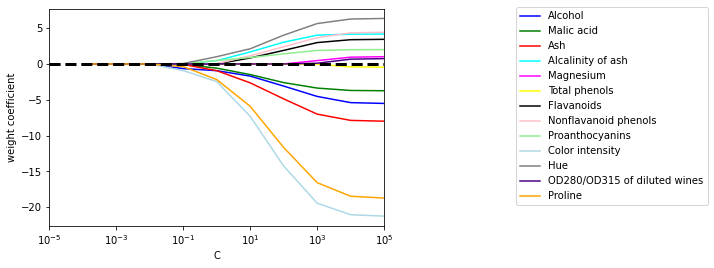

In [30]:
fig = plt.figure()
ax = plt.subplot(111)

colors = [
    "blue",
    "green",
    "red",
    "cyan",
    "magenta",
    "yellow",
    "black",
    "pink",
    "lightgreen",
    "lightblue",
    "gray",
    "indigo",
    "orange",
]

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(
        penalty="l1", C=10.0**c, solver="liblinear", random_state=0
    )

    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim(10.0 ** (-5), 10**5)
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper left", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## Feature importance with Random Forests
We can get a sense of the important features when we use the `RandomForestClassifier` from `sklearn`. 

In [31]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# fit model
forest.fit(
    X_train, y_train
)  # normalizing/standardizing features not req. for Random Forests

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

 1) Color intensity                0.18248
 2) Proline                        0.15861
 3) Flavanoids                     0.15095
 4) OD280/OD315 of diluted wines   0.13199
 5) Alcohol                        0.10659
 6) Hue                            0.07824
 7) Total phenols                  0.06072
 8) Alcalinity of ash              0.03203
 9) Malic acid                     0.02540
10) Proanthocyanins                0.02235
11) Magnesium                      0.02208
12) Nonflavanoid phenols           0.01465
13) Ash                            0.01392


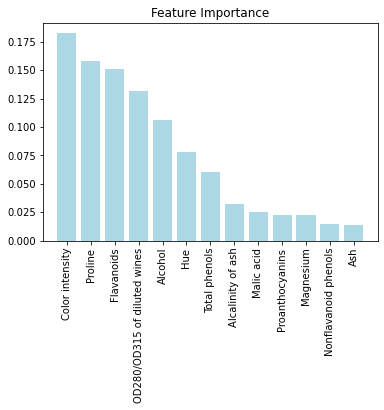

In [32]:
for f in range(X_train.shape[1]):
    print(f"{f+1:2d}) {feat_labels[indices[f]]:<30s} {importances[indices[f]]:1.5f}")

plt.title("Feature Importance")
plt.bar(
    range(X_train.shape[1]), importances[indices], color="lightblue", align="center"
)

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.show()

### Selecting Features with `sklearn`

In [33]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.15, prefit=True)

# Fit and select the features that have explained variance greather than the threshold
X_selected = sfm.transform(X_train)
print(f"Dimensions: {X_train.shape} -->> {X_selected.shape}")

Dimensions: (124, 13) -->> (124, 3)


In [34]:
# now print the selected features and their explained variance
for f in range(X_selected.shape[1]):
    print(f"{f+1:2d}) {feat_labels[indices[f]]:<30s} {importances[indices[f]]:1.5f}")

 1) Color intensity                0.18248
 2) Proline                        0.15861
 3) Flavanoids                     0.15095
